In [1]:
import sys

import math
import numpy as np
import pylab
import nest
import nest.raster_plot
import nest.topology as tp
import uuid

In [2]:
nest.CopyModel('stdp_synapse', 'excitatory', {'mu_plus': 1.0, 'mu_minus':1.0})
nest.CopyModel('stdp_synapse', 'inhibitory', {'mu_plus': -1.0, 'mu_minus':-1.0})
l = tp.CreateLayer({
                 "rows" : 5, 
                 "columns" : 5, 
                 "elements" : "iaf_psc_alpha"} )

In [3]:
# Rectangular mask, constant kernel, non-centered anchor
conn = {'connection_type': 'divergent',
           # 'synapse_model': 'excitatory',
            'mask': {"circular":{"radius":0.75 }},
            'kernel': {'gaussian': {'p_center': 1.0,'sigma': 0.15}},
            'allow_autapses':False
            }

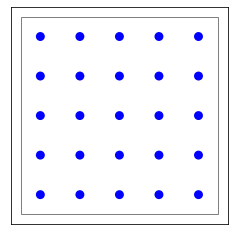

In [4]:
fig = tp.PlotLayer(l, nodesize=80)

In [5]:
tp.ConnectLayers(l,l ,conn)

In [ ]:
center = tp.FindCenterElement(l)

tp.PlotTargets(
    center, 
    l, 
    fig=fig, 
    mask=conn["mask"], 
    kernel=conn["kernel"],
    tgt_color='red'
)